# Proyecto 3: Titanic - ML

* Objetivo: Como estructurar un análisis de datos utilizando datos del Titanic 
* Descargar datos desde kaggle: [Titanic](https://www.kaggle.com/c/titanic)
    * train.csv
    * test.csv

## Pasos de este estudio

1. Carga de datos
2. Exploración
3. Procesamiento
4. Modelos
5. Evaluación
6. Predicción
7. Conclusiones
8. Próximos pasos

## 1. Cargando datos

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [185]:
# Lectura de datos en Python
train = pd.read_csv('/Users/ppando/Materias/python/proy/train.csv')

In [186]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* **sibsp**: # of siblings (hermanos) / spouses (marido, esposa) aboard the Titanic
* **parch**: # of parents (madre, padre) / children (hijos) aboard the Titanic
* **fare**: passenger fare (tarifa)
* **Embarked**: port of embarkation: {C = Cherbourg, Q = Queenstown, S = Southampton}

## 2. Explorando datos (preguntas de interés)

In [187]:
# Qué columnas tienen los datos
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [188]:
# Qué tamaño tienen los datos
train.shape

(891, 12)

In [189]:
# Hay valores nulos en los datos
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [190]:
# Cómo se distribuyen las variables numéricas
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [191]:
# Cómo se comportan las variables categóricas
train.describe(include=['O'])
# top: es la que mas se repite

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


## EDA: Estudio de la variable target (como los sobrevivientes se comportaron respecto a otras variables)

In [192]:
# Vamos a entrenar el modelo para la columna 'Survived' utilizando el train
c_survived = train.groupby(['Survived']).count()
c_survived

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,549,549,549,549,424,549,549,549,549,68,549
1,342,342,342,342,290,342,342,342,342,136,340


In [193]:
c_survived['PassengerId']

Survived
0    549
1    342
Name: PassengerId, dtype: int64

In [194]:
# target vs sex
c_survived_sex = train.groupby(['Survived', 'Sex']).count()
c_survived_sex

PassengerId  Pclass  Name  Age  SibSp  Parch  Ticket  Fare  \
Survived Sex                                                                  
0        female           81      81    81   64     81     81      81    81   
         male            468     468   468  360    468    468     468   468   
1        female          233     233   233  197    233    233     233   233   
         male            109     109   109   93    109    109     109   109   

                 Cabin  Embarked  
Survived Sex                      
0        female      6        81  
         male       62       468  
1        female     91       231  
         male       45       109

In [195]:
c_survived_sex = c_survived_sex['PassengerId']
c_survived_sex

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: PassengerId, dtype: int64

In [196]:
# se trasponen los datos, ayuda a la gráfica
c_survived_sex.unstack(level=0)

Survived,0,1
Sex,,
female,81,233
male,468,109


<Axes: xlabel='Sex'>

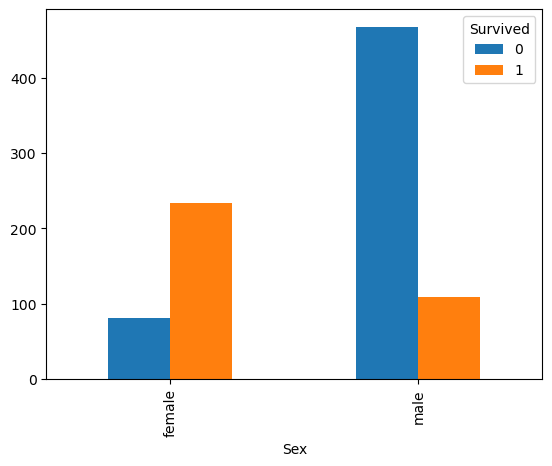

In [197]:
c_survived_sex.unstack(level=0).plot.bar()

<Axes: xlabel='Embarked'>

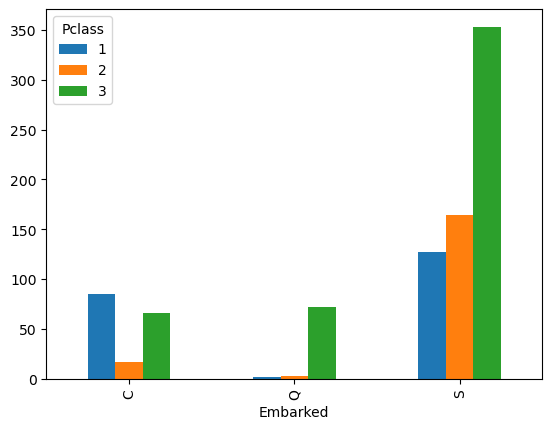

In [198]:
# embarked vs pclass
train.groupby(['Pclass', 'Embarked']).count()['PassengerId'].unstack(level=0).plot.bar()

## 3. Procesamiento de datos

* Empezamos seleccionando las variables que queremos trabajar (hacer el modelo) que serían:
    * Survived
    * Sex
    * Age
    * Pclass  

In [199]:
train[['Survived', 'Sex', 'Age', 'Pclass']].head(3)

,Survived,Sex,Age,Pclass
0,0,male,22.0,3
1,1,female,38.0,1
2,1,female,26.0,3


In [200]:
# Estudiamos los datos nulo
train[['Survived', 'Sex', 'Age', 'Pclass']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   Pclass    891 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB


* Se observa que tenemos que mejorar:
    * Datos faltantes en **Age**
    * La variable **Sex** aparece como object y queremos int o float para algoritmos 

In [201]:
# mirar como se distribuyen los nulos en edad
train[train['Age'].isna()].groupby(['Sex', 'Pclass']).count()['PassengerId'].unstack(level=0)

Sex,female,male
Pclass,,
1,9,21
2,2,9
3,42,94


* Se observa que los hombres de la 3ra clase parece que no han registrado su edad

In [202]:
train[train['Age'].isna()].groupby(['SibSp', 'Parch']).count()['PassengerId'].unstack(level=0)

SibSp,0,1,2,3,8
Parch,,,,,
0,133.0,21.0,3.0,NaN,NaN
1,1.0,3.0,NaN,4.0,NaN
2,3.0,2.0,NaN,NaN,7.0


* Gente que viajaba mayormente sola tampoco ha registrado su edad

* Esto nos da una idea de que se puede crear una variable que indique si la persona viaja sola o acompañada

In [203]:
# Calcular la mediana de Age para imputar
train['Age'].median()

28.0

In [204]:
# Imputar valor para rellenar nulos
train['Age'] = train['Age'].fillna(28.0)

In [205]:
train[['Survived', 'Sex', 'Age', 'Pclass']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   Pclass    891 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB


In [206]:
# map para label encoding
train['Sex'] = train['Sex'].map({'female': 1, 'male': 0}).astype(int)

In [207]:
# ahora tenemos la tabla preprocesada lista
train[['Survived', 'Sex', 'Age', 'Pclass']].head(3)

,Survived,Sex,Age,Pclass
0,0,0,22.0,3
1,1,1,38.0,1
2,1,1,26.0,3


## Crear nuevas variables

In [208]:
# Crear nueva variable tipo flag "solo"
train['FlagSolo'] = np.where((train['SibSp'] == 0) & (train['Parch'] == 0), 1, 0)

<Axes: xlabel='FlagSolo'>

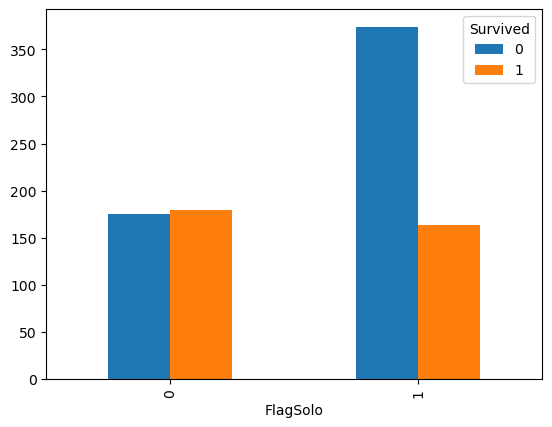

In [209]:
grouped_flag = train.groupby(['Survived', 'FlagSolo']).count()['PassengerId']
grouped_flag.unstack(level=0).plot.bar()

In [210]:
train[['Survived', 'Sex', 'Age', 'Pclass', 'FlagSolo']].head(3)

,Survived,Sex,Age,Pclass,FlagSolo
0,0,0,22.0,3,0
1,1,1,38.0,1,0
2,1,1,26.0,3,1


Estos serán los datos con los que vamos a hacer modelos

In [211]:
# variable dependiente
Y_train = train['Survived']
Y_train.shape

(891,)

In [212]:
# preprocesamiento de variables independientes
X_train = train[['Sex', 'Age', 'Pclass', 'FlagSolo']]
X_train.shape

(891, 4)

## 4. Modelos

* Sin entrar en mucho detalle. Vamos a seleccionar dos modelos de prueba:
    * regresión logística: problemas de clasificación. Predecir el grupo al que pertenece el objeto actual (sobrevive / no sobrevive)
    * árboles de decisión

In [213]:
from sklearn.linear_model import LogisticRegression

In [214]:
# entrenando modelo regresión logística
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

LogisticRegression()

In [215]:
from sklearn.tree import DecisionTreeClassifier

In [216]:
# entrenando modelo árboles de decisión
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier()

## 5. Evaluación

In [217]:
test = pd.read_csv('/Users/ppando/Materias/python/proy/test.csv')

In [218]:
# Se prepara el test set para evaluación
# Vemos que no está la variable de supervivencia
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [219]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [220]:
# preprocesando test set

# hacer map a Sex
test['Sex'] = test['Sex'].map({'female': 1, 'male': 0}).astype(int)

# rellenar Age (imputar)
test['Age'] = test['Age'].fillna(28.0)

# crear FlagSolo
test['FlagSolo'] = np.where((test['SibSp'] == 0) & (test['Parch'] == 0), 1, 0)

In [221]:
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FlagSolo
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q,1


In [222]:
test.info() # Vemos que tenemos 418 casos para hacer las predicciones

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  FlagSolo     418 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 39.3+ KB


## 6. Predicción

In [223]:
# predicción de Survived en test set
X_test = test[['Sex', 'Age', 'Pclass', 'FlagSolo']]
Y_pred_log = logreg.predict(X_test)
Y_pred_tree = decision_tree.predict(X_test)

In [224]:
Y_pred_log[0:20]

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0])

In [225]:
Y_pred_tree[0:20]

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0])

**Nota**: Estas predicciones deberán ser ahora comparadas con el valor real para obtener una mejor estimación del error de predicción sobre el test set y poder seleccionar un modelo

Sin embargo, como es una competición de Kaggle este valor sólo lo conoce la plataforma

In [226]:
# función para descargar en la computadora
def descarga_salida(y_pred, nombre_archivo):
    output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': y_pred})
    output.to_csv(nombre_archivo, index=False)

In [227]:
descarga_salida(Y_pred_log, '/Users/ppando/Materias/python/proy/pred_log.csv')
descarga_salida(Y_pred_tree, '/Users/ppando/Materias/python/proy/pred_tree.csv')

## 7. Conclusiones

* Importante es el análisis exploratorio que se hizo, porque vimos como se compotaba la variable **Survived**, y eso nos ayudó a detectar que la **Age** y el **Sex** nos podrian servir como variables explicativas 
* Creación de variables: pasajeros que viajaban solos parecia que tenian algún tipo de tasa diferente de supervivencia o no
* Probar varios modelos. en este caso dos modelos
* Se vio (casi) todo el proceso de ciencia de datos en un ejemplo 

## 8. Próximos pasos

1. **Deployar** el modelo entrenado a producción (servidores informáticos)
2. **Obtener** predicciones desde el modelo
3. **Monitorear** las predicciones
4. **Administrar** los modelos y versiones en la medida que sea necesario